In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("group7_data.csv")
# include the selected features only
df = df[['VENDOR', 'FREQUENCY', 'RECENCY', 'AVG_COST', 'PROFIT']]
df.head()

,VENDOR,FREQUENCY,RECENCY,AVG_COST,PROFIT
0,5511283,2582606.0,2005-08-27,12.032232,1.692641e+07
1,113645,1044197.0,2005-08-27,26.176994,1.326559e+07
2,13031,418163.0,2005-08-27,3.210998,8.108495e+05
3,5715232,369674.0,2005-08-27,32.926035,1.292774e+06
4,3626213,367217.0,2005-08-27,1.626938,5.297867e+05


### K-Means Clutersting with All Features

In [3]:
# convert date to float 
epoch = datetime.utcfromtimestamp(0)
df['RECENCY']=[datetime.strptime(rec, '%Y-%m-%d') for rec in df['RECENCY']]
df['RECENCY_FLOAT'] = [(rec - epoch).total_seconds() for rec in df['RECENCY']]


In [4]:
df.describe()

,VENDOR,FREQUENCY,AVG_COST,PROFIT,RECENCY_FLOAT
count,8.910000e+02,8.910000e+02,891.000000,8.910000e+02,8.910000e+02
mean,4.591729e+06,1.603493e+04,23.498894,1.049009e+05,1.122099e+09
std,3.013742e+06,9.949963e+04,37.180342,7.468813e+05,6.382045e+06
min,1.000100e+04,1.000000e+00,1.237273,-5.316025e+05,1.091923e+09
25%,1.816342e+06,5.550000e+01,7.961002,3.588000e+01,1.122941e+09
50%,4.813313e+06,1.124000e+03,14.000000,3.593220e+03,1.125101e+09
75%,7.113316e+06,7.910500e+03,25.686231,4.404835e+04,1.125101e+09
max,9.919401e+06,2.582606e+06,439.710000,1.692641e+07,1.125101e+09


Plot histograms to view the distribution of the features

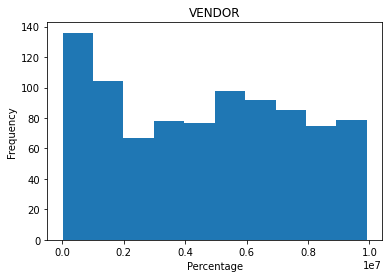

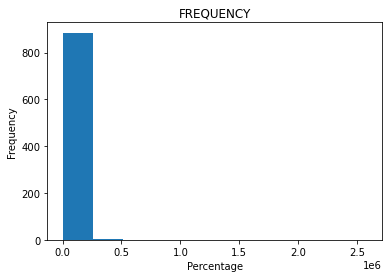

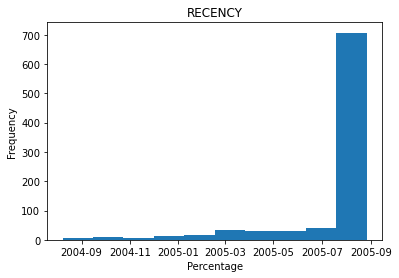

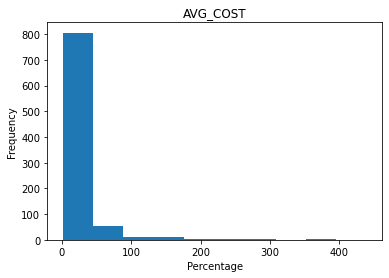

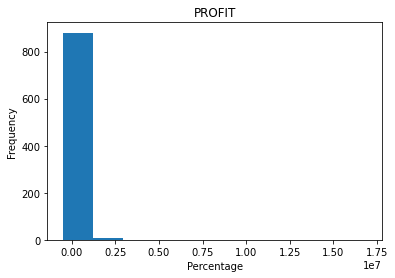

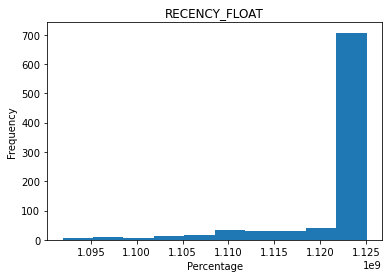

In [5]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')
    plt.show()
plt.show()

In [6]:
df_numerical = df.drop(['RECENCY', 'VENDOR'], axis=1)

scaled_arr = StandardScaler().fit_transform(df_numerical)
df_scaled = pd.DataFrame(scaled_arr, columns=df_numerical.columns)
df_scaled.describe()

,FREQUENCY,AVG_COST,PROFIT,RECENCY_FLOAT
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-5.862626e-17,1.691501e-16,-2.523857e-16,1.642682e-14
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.612361e-01,-5.990834e-01,-8.526935e-01,-4.730860e+00
25%,-1.606881e-01,-4.181408e-01,-1.404827e-01,1.320048e-01
50%,-1.499433e-01,-2.556251e-01,-1.357171e-01,4.706445e-01
75%,-8.169871e-02,5.886350e-02,-8.152129e-02,4.706445e-01
max,2.580927e+01,1.120067e+01,2.253499e+01,4.706445e-01


Create T-SNE plot to identify clusterbility and clustering structure

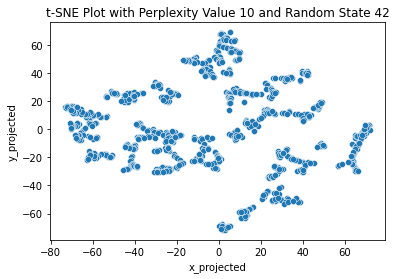

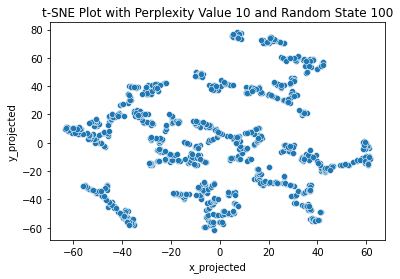

--------------------------------------------


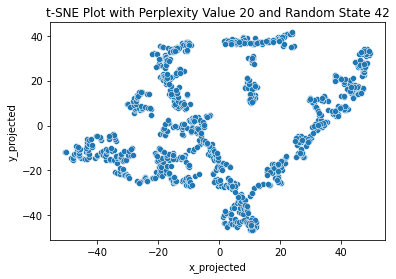

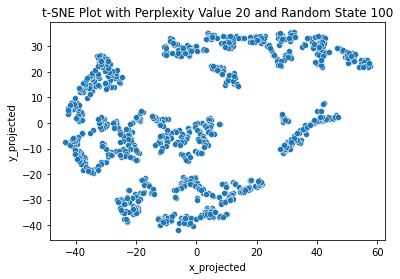

--------------------------------------------


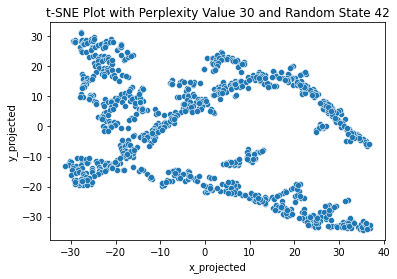

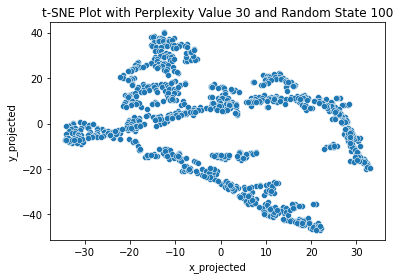

--------------------------------------------


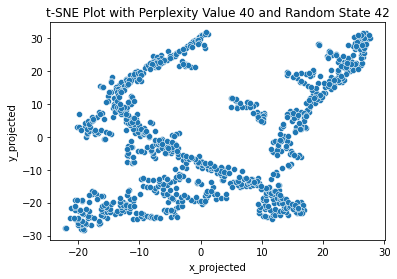

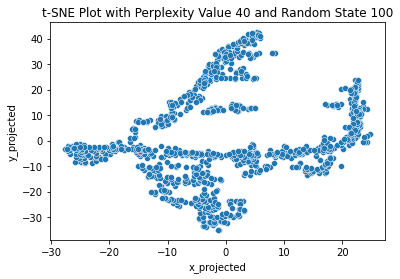

--------------------------------------------


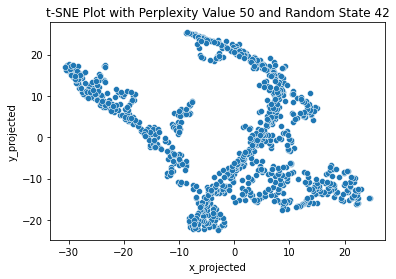

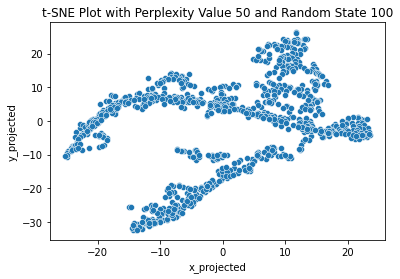

--------------------------------------------


In [7]:
for perp in [10, 20, 30, 40, 50]:
    for rs in [42, 100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_scaled)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected',  data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

The T-SNE plot suggests that:
1. There are roughly 4 clusters
2. The clusters are well-separated
3. The shape of the clusters are non-spherical

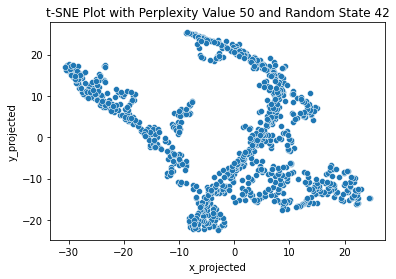

In [8]:
# pick one combination of randome state and preplexity from above
scaled_tsne = TSNE(n_components=2, perplexity=50, random_state=42)
data_scaled_tsne = scaled_tsne.fit_transform(df_scaled)
df_scaled_tsne = pd.DataFrame(data_scaled_tsne, columns=['x_projected', 'y_projected'])
df_scaled_combo = pd.concat([df, df_scaled_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_scaled_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(50, 42))
plt.show()

Apply k-means clustering to the scaled data

In [9]:
scaled_kmeans = KMeans(n_clusters=4, random_state=42).fit(df_scaled)
df_scaled_combo['predicted_cluster_kmeans'] = scaled_kmeans.labels_

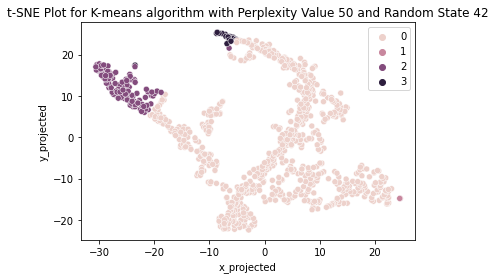

In [10]:
sns.scatterplot(x='x_projected', y='y_projected', hue='predicted_cluster_kmeans', data=df_scaled_combo)
plt.title('t-SNE Plot for K-means algorithm with Perplexity Value %s and Random State %s' %(50, 42))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Create an elbow plot to identify the number of clusters

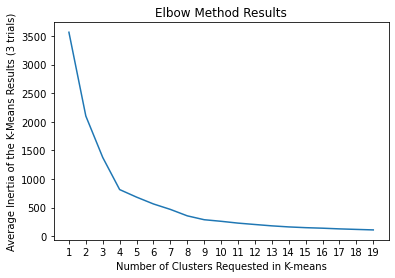

In [11]:
Ks = range(1,20)
avg_inertias = []
for k in Ks:
    sub_inertias= []   
    for i in range(0,3):
        kmeans = KMeans(n_clusters = k).fit(df_scaled)
        sub_inertias.append(kmeans.inertia_)
    avg_inertias.append(np.average(sub_inertias))

plt.plot(Ks, avg_inertias)
plt.xticks(range(1,20))
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results')
plt.show()

The elbow plot suggests that there are roughly 4 clusters.

### K-Means Clustering

K-means algorithm with 4 clusters as suggested by the elbow plot

In [12]:
kmeans=KMeans(n_clusters=4, random_state=42).fit(df_scaled)
df_scaled['predicted_cluster_4']=kmeans.labels_
df_scaled.head()

,FREQUENCY,AVG_COST,PROFIT,RECENCY_FLOAT,predicted_cluster_4
0,25.809268,-0.308580,22.534988,0.470644,1
1,10.339129,0.072070,17.630751,0.470644,1
2,4.043773,-0.545968,0.945726,0.470644,0
3,3.556171,0.253694,1.591338,0.470644,0
4,3.531464,-0.588597,0.569200,0.470644,0


In [31]:
# add predicted_cluster to original dataframe for clustering analysis
df_copy = df.copy()
df_copy['predicted_cluster_4'] = df_scaled['predicted_cluster_4']
df_copy.head()

,VENDOR,FREQUENCY,RECENCY,AVG_COST,PROFIT,RECENCY_FLOAT,predicted_cluster_4
0,5511283,2582606.0,2005-08-27,12.032232,1.692641e+07,1.125101e+09,1
1,113645,1044197.0,2005-08-27,26.176994,1.326559e+07,1.125101e+09,1
2,13031,418163.0,2005-08-27,3.210998,8.108495e+05,1.125101e+09,0
3,5715232,369674.0,2005-08-27,32.926035,1.292774e+06,1.125101e+09,0
4,3626213,367217.0,2005-08-27,1.626938,5.297867e+05,1.125101e+09,0


### Create side-by-side boxplots visualizations.

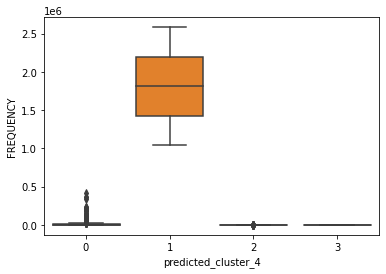

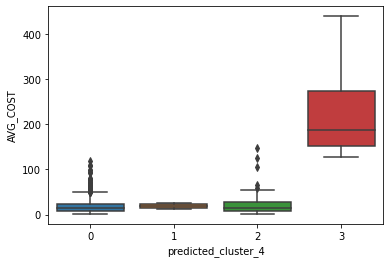

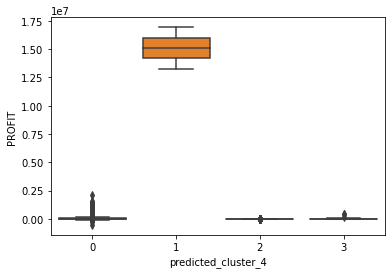

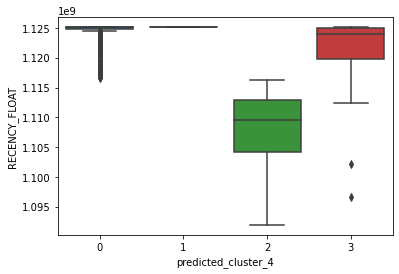

In [32]:
for i in range(6):
    if i == 0 or i == 2: continue #skip vendor and recency when plotting
    sns.boxplot(x='predicted_cluster_4', y=df_copy.iloc[:, i], data=df_copy)
    plt.show()

Based on the boxplots above:
* Cluster 1 is the best performing cluster, the vendors have high frequency, low average cost, high profit, high recency.
* Cluster 3 is the worst performing cluster, the vendors have low frequency, high average cost, low profit and on average high recency, but also contains low recency outliers.
* Cluster 0 and Cluster 2 are the average performing clusters.

Cluster 1 Analysis:

In [15]:
df_copy.groupby(['predicted_cluster_4']).count()

,VENDOR,FREQUENCY,RECENCY,AVG_COST,PROFIT,RECENCY_FLOAT
predicted_cluster_4,,,,,,
0,751,751,751,751,751,751
1,2,2,2,2,2,2
2,118,118,118,118,118,118
3,20,20,20,20,20,20


In [16]:
cluster1_2vendors = df_copy[df_copy['predicted_cluster_4'] == 1]
cluster1_2vendors

,VENDOR,FREQUENCY,RECENCY,AVG_COST,PROFIT,RECENCY_FLOAT,predicted_cluster_4
0,5511283,2582606.0,2005-08-27,12.032232,1.692641e+07,1.125101e+09,1
1,113645,1044197.0,2005-08-27,26.176994,1.326559e+07,1.125101e+09,1


**REPEAT THE ABOVE CLUSTERING ALGORITHM WITHOUT THE 2 BEST PERFORMING VENDORS**

In [17]:
df_drop2 = df[2:]
df_drop2 = df_drop2.reset_index(drop=True)
df_drop2.head()

,VENDOR,FREQUENCY,RECENCY,AVG_COST,PROFIT,RECENCY_FLOAT
0,13031,418163.0,2005-08-27,3.210998,8.108495e+05,1.125101e+09
1,5715232,369674.0,2005-08-27,32.926035,1.292774e+06,1.125101e+09
2,3626213,367217.0,2005-08-27,1.626938,5.297867e+05,1.125101e+09
3,2012863,337235.0,2005-08-27,2.881389,9.557425e+05,1.125101e+09
4,3313116,236312.0,2005-08-27,17.523973,1.225840e+06,1.125101e+09


In [18]:
df_drop2.describe()

,VENDOR,FREQUENCY,AVG_COST,PROFIT,RECENCY_FLOAT
count,8.890000e+02,889.000000,889.000000,8.890000e+02,8.890000e+02
mean,4.595732e+06,11991.358830,23.508780,7.117514e+04,1.122092e+09
std,3.013229e+06,36021.403653,37.220090,2.103516e+05,6.387635e+06
min,1.000100e+04,1.000000,1.237273,-5.316025e+05,1.091923e+09
25%,1.816344e+06,54.000000,7.959204,3.576000e+01,1.122941e+09
50%,4.813313e+06,1089.000000,14.000000,3.517030e+03,1.125101e+09
75%,7.113317e+06,7810.000000,25.676471,4.393340e+04,1.125101e+09
max,9.919401e+06,418163.000000,439.710000,2.078299e+06,1.125101e+09


In [19]:
df_numerical2 = df_drop2.drop(['RECENCY', 'VENDOR'], axis=1)

scaled_arr = StandardScaler().fit_transform(df_numerical2)
df_scaled2 = pd.DataFrame(scaled_arr, columns=df_numerical2.columns)
df_scaled2.describe()

,FREQUENCY,AVG_COST,PROFIT,RECENCY_FLOAT
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,1.963184e-16,3.259485e-17,-1.463646e-16,1.742888e-15
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-3.330550e-01,-5.987101e-01,-2.867185e+00,-4.725668e+00
25%,-3.315828e-01,-4.180089e-01,-3.383832e-01,1.329474e-01
50%,-3.028337e-01,-2.556182e-01,-3.218241e-01,4.712910e-01
75%,-1.161452e-01,5.827258e-02,-1.295787e-01,4.712910e-01
max,1.128219e+01,1.118846e+01,9.547130e+00,4.712910e-01


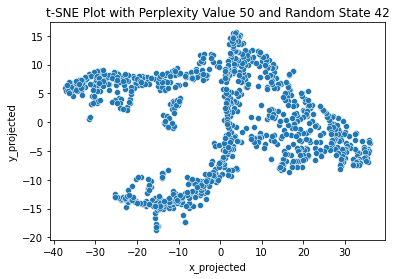

In [20]:
# pick one combination of randome state and preplexity from above
scaled_tsne = TSNE(n_components=2, perplexity=50, random_state=42)
data_scaled_tsne = scaled_tsne.fit_transform(df_scaled2)
df_scaled_tsne = pd.DataFrame(data_scaled_tsne, columns=['x_projected', 'y_projected'])
df_scaled_combo2 = pd.concat([df_drop2, df_scaled_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_scaled_combo2)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(50, 42))
plt.show()

In [21]:
scaled_kmeans = KMeans(n_clusters=4, random_state=42).fit(df_scaled2)
df_scaled_combo2['predicted_cluster_kmeans'] = scaled_kmeans.labels_

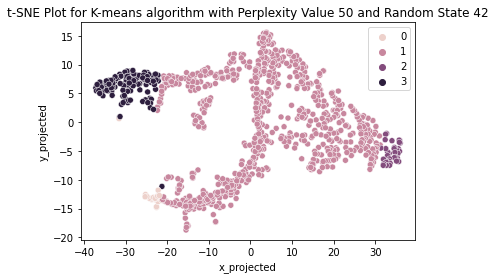

In [22]:
sns.scatterplot(x='x_projected', y='y_projected', hue='predicted_cluster_kmeans', data=df_scaled_combo2)
plt.title('t-SNE Plot for K-means algorithm with Perplexity Value %s and Random State %s' %(50, 42))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

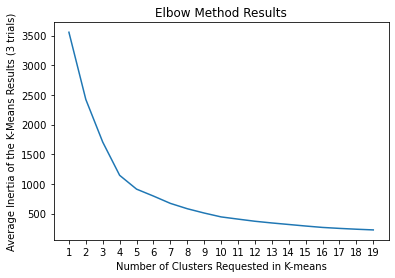

In [23]:
Ks = range(1,20)
avg_inertias = []
for k in Ks:
    sub_inertias= []   
    for i in range(0,3):
        kmeans = KMeans(n_clusters = k).fit(df_scaled2)
        sub_inertias.append(kmeans.inertia_)
    avg_inertias.append(np.average(sub_inertias))

plt.plot(Ks, avg_inertias)
plt.xticks(range(1,20))
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results')
plt.show()

In [33]:
kmeans2=KMeans(n_clusters=4, random_state=42).fit(df_scaled2)
df_scaled2['predicted_cluster_4']=kmeans2.labels_
df_scaled2.head()

,FREQUENCY,AVG_COST,PROFIT,RECENCY_FLOAT,predicted_cluster_4
0,11.282189,-0.545652,3.518351,0.471291,1
1,9.935315,0.253158,5.810687,0.471291,1
2,9.867067,-0.588235,2.181442,0.471291,1
3,9.034260,-0.554512,4.207553,0.471291,1
4,6.230932,-0.160886,5.492304,0.471291,1


In [34]:
# add predicted_cluster to original dataframe for clustering analysis
df_copy2 = df_drop2.copy()
df_copy2['predicted_cluster_4'] = df_scaled2['predicted_cluster_4']
df_copy2.head()

,VENDOR,FREQUENCY,RECENCY,AVG_COST,PROFIT,RECENCY_FLOAT,predicted_cluster_4
0,13031,418163.0,2005-08-27,3.210998,8.108495e+05,1.125101e+09,1
1,5715232,369674.0,2005-08-27,32.926035,1.292774e+06,1.125101e+09,1
2,3626213,367217.0,2005-08-27,1.626938,5.297867e+05,1.125101e+09,1
3,2012863,337235.0,2005-08-27,2.881389,9.557425e+05,1.125101e+09,1
4,3313116,236312.0,2005-08-27,17.523973,1.225840e+06,1.125101e+09,1


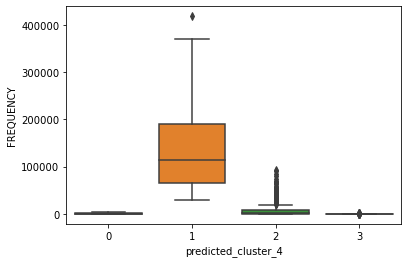

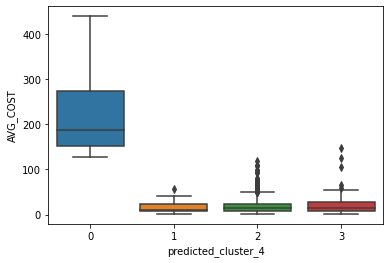

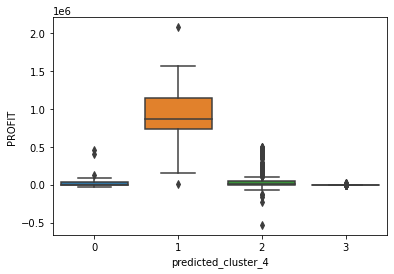

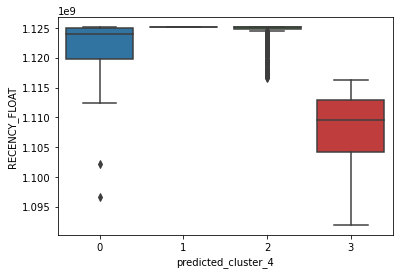

In [35]:
for i in range(6):
    if i == 0 or i == 2: continue #skip vendor and recency when plotting
    sns.boxplot(x='predicted_cluster_4', y=df_copy2.iloc[:, i], data=df_copy2)
    plt.show()

After dropping the 2 best performing vendors from above, we identify the new cluster 2 as the best cluster and new cluster 0 as the worst cluster.

In [27]:
df_copy2.groupby(['predicted_cluster_4']).count()

,VENDOR,FREQUENCY,RECENCY,AVG_COST,PROFIT,RECENCY_FLOAT
predicted_cluster_4,,,,,,
0,20,20,20,20,20,20
1,715,715,715,715,715,715
2,36,36,36,36,36,36
3,118,118,118,118,118,118


In [28]:
cluster2 = df_copy2[df_copy2['predicted_cluster_4'] == 2]
best_cluster = pd.concat([cluster1_2vendors, cluster2], axis=0)
best_cluster

,VENDOR,FREQUENCY,RECENCY,AVG_COST,PROFIT,RECENCY_FLOAT,predicted_cluster_4
0,5511283,2582606.0,2005-08-27,12.032232,1.692641e+07,1.125101e+09,1
1,113645,1044197.0,2005-08-27,26.176994,1.326559e+07,1.125101e+09,1
0,13031,418163.0,2005-08-27,3.210998,8.108495e+05,1.125101e+09,2
1,5715232,369674.0,2005-08-27,32.926035,1.292774e+06,1.125101e+09,2
2,3626213,367217.0,2005-08-27,1.626938,5.297867e+05,1.125101e+09,2
3,2012863,337235.0,2005-08-27,2.881389,9.557425e+05,1.125101e+09,2
4,3313116,236312.0,2005-08-27,17.523973,1.225840e+06,1.125101e+09,2
5,9520439,229014.0,2005-08-27,7.674866,1.534820e+06,1.125101e+09,2
6,313319,219464.0,2005-08-27,1.875157,4.578664e+05,1.125101e+09,2
7,6016957,197415.0,2005-08-27,6.811654,1.121791e+06,1.125101e+09,2


In [29]:
worst_cluster = df_copy2[df_copy2['predicted_cluster_4'] == 0]
worst_cluster

,VENDOR,FREQUENCY,RECENCY,AVG_COST,PROFIT,RECENCY_FLOAT,predicted_cluster_4
294,115362,4479.0,2005-08-27,147.063803,462565.79,1.125101e+09,0
296,7045883,4411.0,2005-08-27,272.779062,-34887.60,1.125101e+09,0
310,7211456,3926.0,2005-08-27,152.915700,401614.78,1.125101e+09,0
375,7095883,2189.0,2005-08-27,225.000000,90766.34,1.125101e+09,0
376,7055883,2158.0,2005-08-26,170.457671,35475.22,1.125014e+09,0
389,7035883,1949.0,2005-08-27,223.013909,22879.98,1.125101e+09,0
477,2819403,742.0,2005-08-19,147.520253,134522.02,1.124410e+09,0
534,6935883,343.0,2005-08-19,275.000000,57517.50,1.124410e+09,0
675,1012863,50.0,2005-08-21,392.207547,2191.58,1.124582e+09,0
726,16605,20.0,2005-08-26,126.782609,-669.90,1.125014e+09,0


In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled2, kmeans2.labels_)

0.7034580759469561

We get a relatively large sihouette score of 0.6593, which indicates that our clusters have great cohesion and separation.